# Setup

In [2]:
!pip install networkx python-igraph cdlib igraph leidenalg optuna > /dev/null 2>&1

In [3]:
!pip freeze > requirements.txt

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib.algorithms import leiden
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd
import optuna

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [5]:
# DATA_FOLDER = './data/'
# DATA_FOLDER = '/home/dani/University/Analisis_de_redes_sociales_y_Computacion_Evolutiva_y_Bioinspirada_hito_2/data/'
DATA_FOLDER = '/home/ubuntu/'
EJ_A = 'amazon_graph.graphml'

ROUTE_EJ_A = DATA_FOLDER + EJ_A

## CUDA

In [6]:
import tensorflow as tf
import os

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpus = tf.config.experimental.list_physical_devices('GPU')
for i, gpu in enumerate(gpus):
    print(f"GPU {i}: {gpu.name}")

Num GPUs Available:  5
GPU 0: /physical_device:GPU:0
GPU 1: /physical_device:GPU:1
GPU 2: /physical_device:GPU:2
GPU 3: /physical_device:GPU:3
GPU 4: /physical_device:GPU:4


2024-01-02 18:19:00.720932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 18:19:00.721214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 18:19:00.721435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 18:19:00.721654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 18:19:00.721869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

## Utils

In [22]:
def show_coms_info(coms):
  communities = coms.communities
  communities_sizes = [len(community) for community in communities]

  print(f"[🤓] Total communities: {len(communities)}")

  for idx, community in enumerate(communities):
      print(f"\t[🫂] Community {idx + 1}: {communities_sizes[idx]} nodes")

  node_community_map = coms.to_node_community_map()
  print("\n===== Node-to-community mapping:=====")
  print(node_community_map)


colormap = plt.cm.tab20

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colors = [str_color(*colormap(v)) for v in values]
    return colors

def draw_communities(coms, ax=None):
    colors = assign_colors([coms[n] for n in amazon_graph.nodes()])
    nx.draw(amazon_graph, with_labels=True, ax=ax, node_color=colors)
    ax.set_title(f"Q:{nx.community.modularity(amazon_graph, to_communities_list(coms)):.4f}")

def to_communities_list(coms):
    c_pos = {v:i for i,v in enumerate(set(coms.values()))}

    num_c = len(c_pos)
    com_list = [[] for _ in range(num_c)]

    for k,v in coms.items():
        com_list[c_pos[v]].append(k)

    return com_list

def to_communities_dict(coms):
    inv_map = {}
    for k, v in coms.items():
        inv_map[v] = inv_map.get(v, []) + [k]

    return inv_map


In [19]:
def plot_graph(coms):
  _,ax = plt.subplots(1,figsize=(50,50))
  comm_map = coms.to_node_community_map()
  print(leiden_coms)

  coms = {k:v[0] for k,v in comm_map.items()}
  draw_communities(coms,ax)


# Apartado A - Detección de comunidades con el algoritmo de Leiden

- Consiste en utilizar hiperparámetros para optimizar el algoritmo de Leiden

In [8]:
amazon_graph = nx.read_graphml(ROUTE_EJ_A)

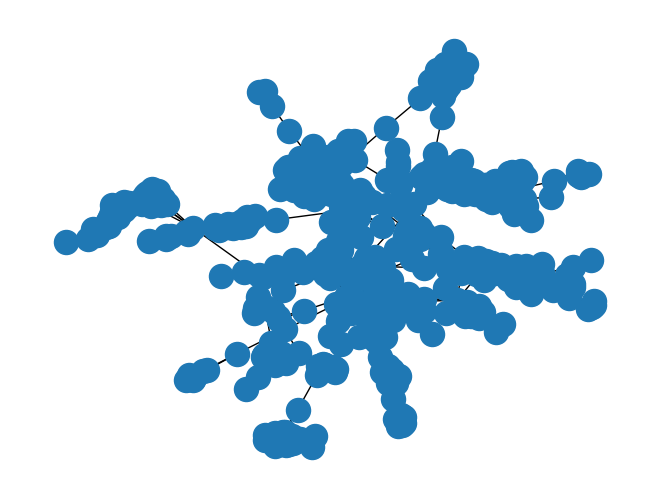

In [9]:
nx.draw(amazon_graph, with_labels=False)
plt.show()

In [10]:
num_nodes = amazon_graph.number_of_nodes()
num_edges = amazon_graph.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 475
Number of edges: 1184


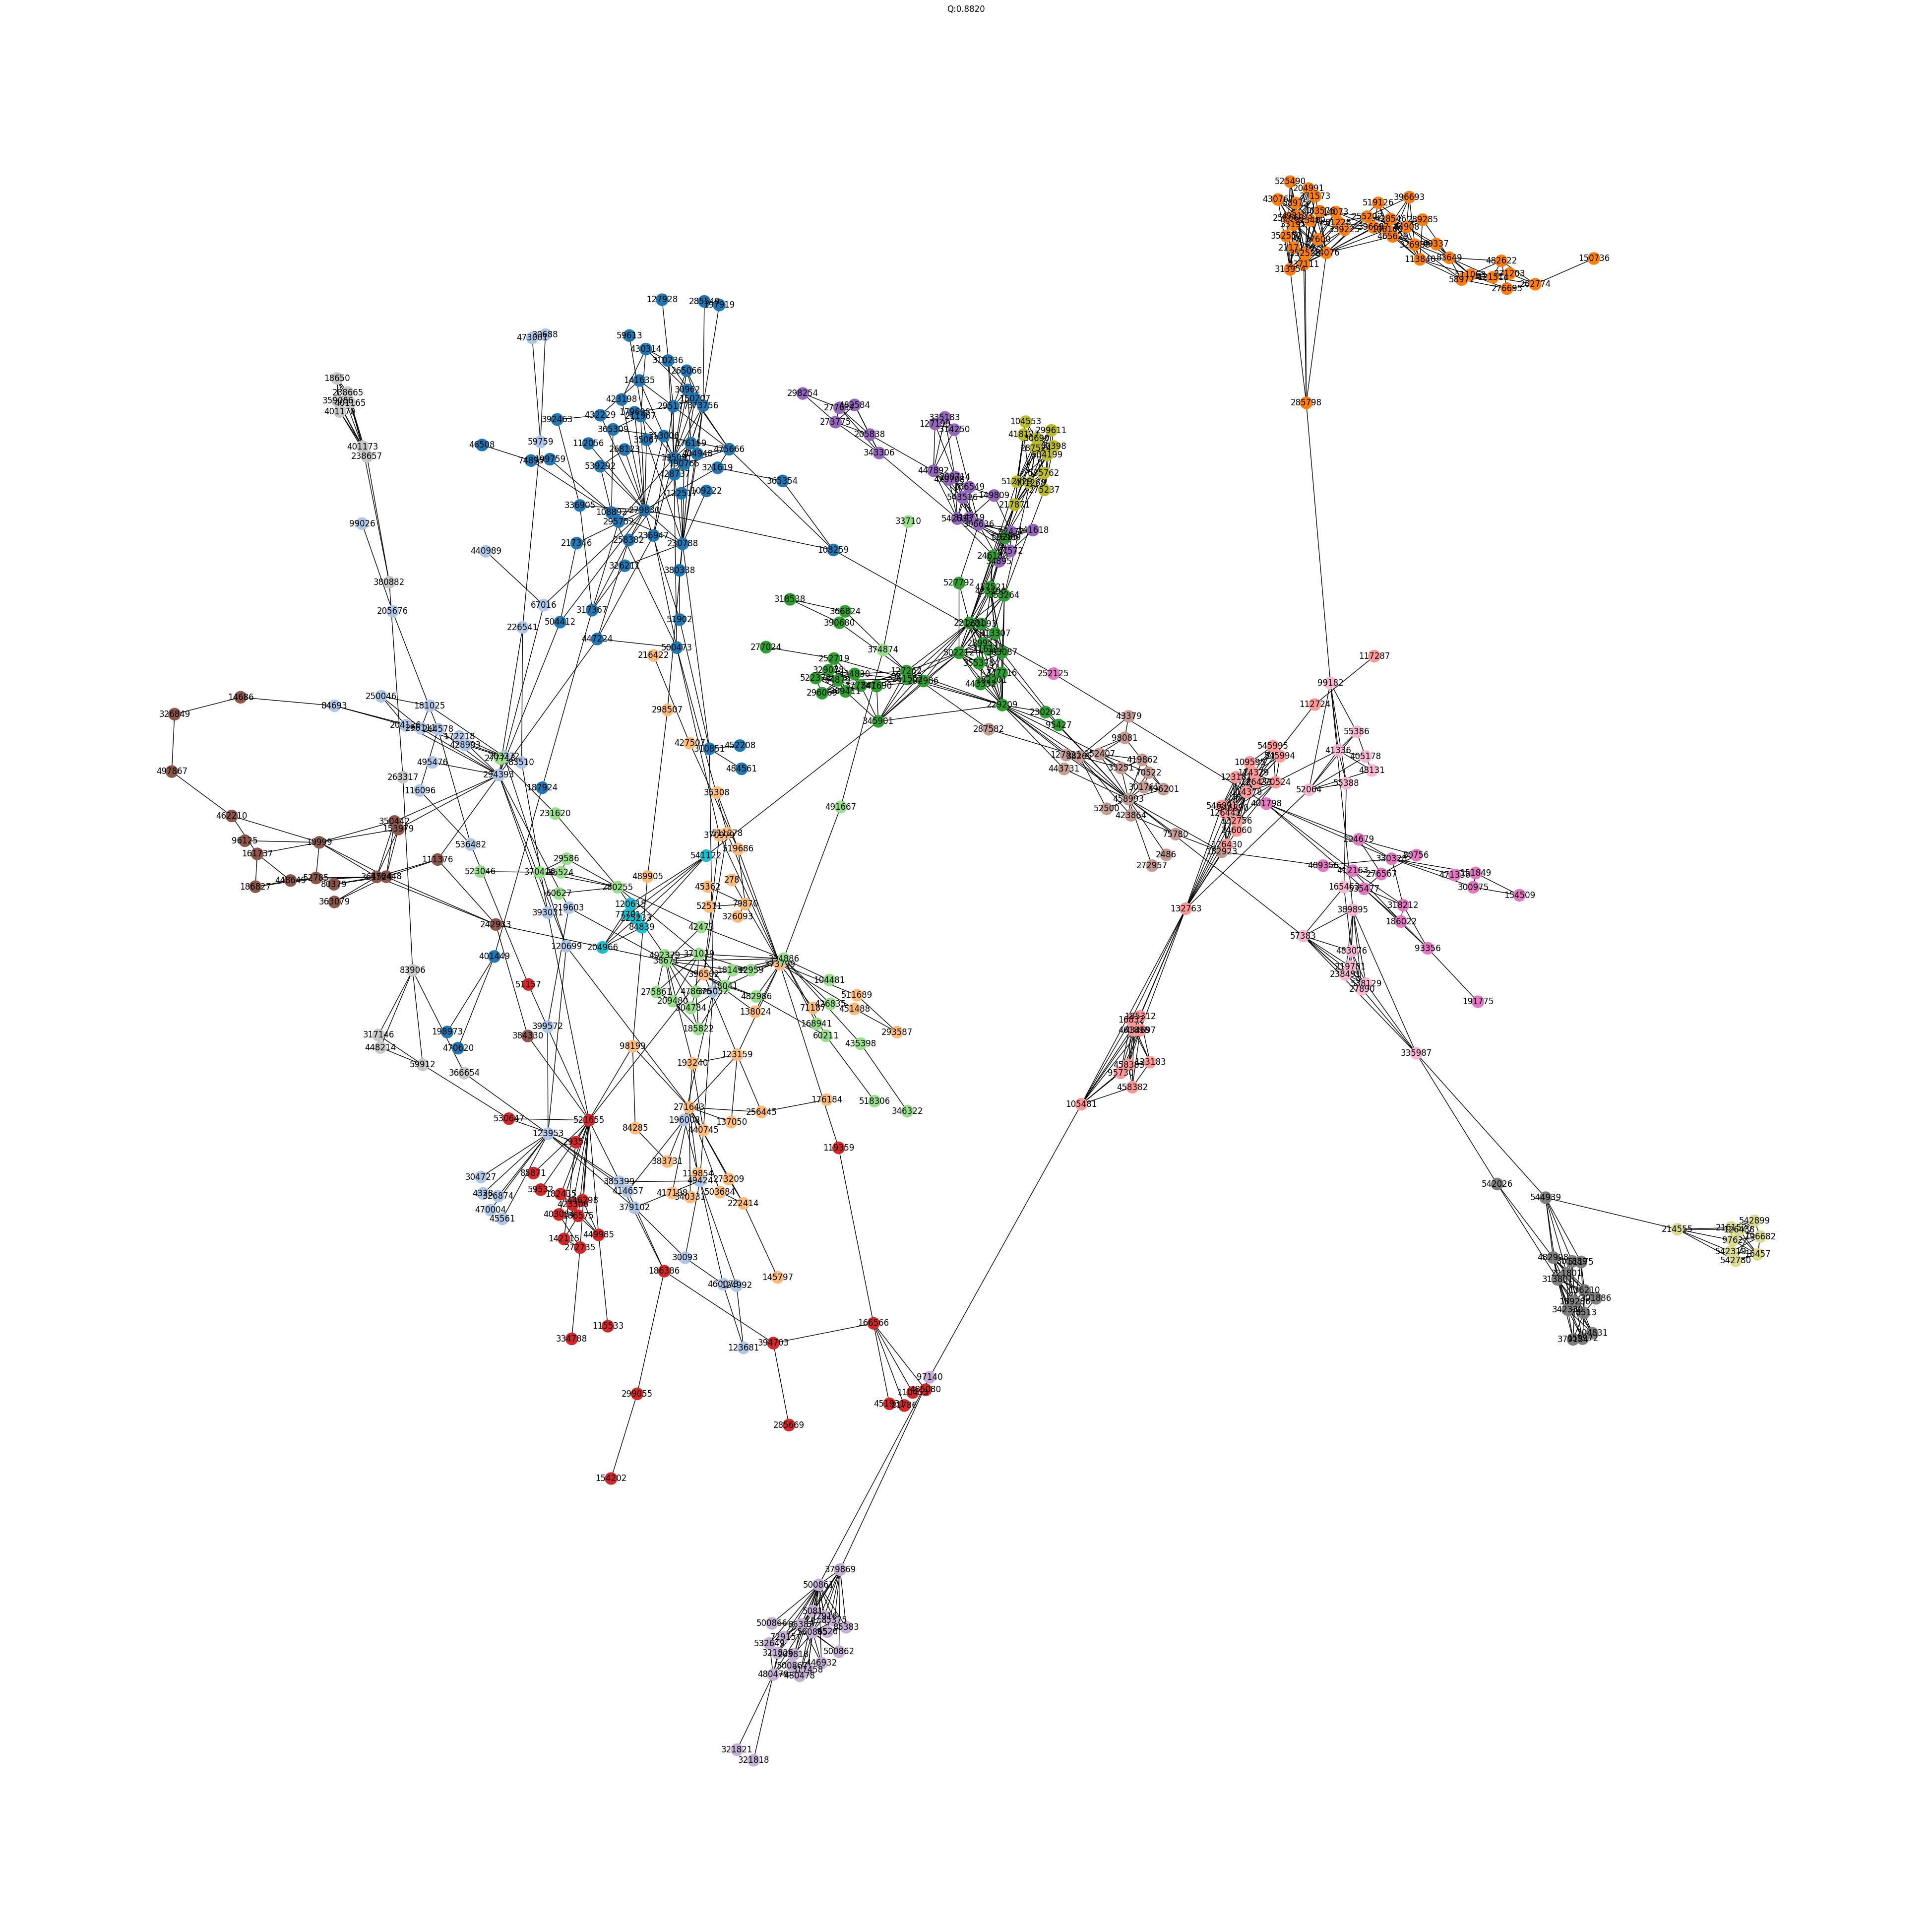

In [23]:
leiden_coms = leiden(amazon_graph)
plot_graph(leiden_coms)

In [12]:
unoptimized_coms = leiden(amazon_graph)       # same as coms = leiden(amazon_graph, initial_membership=None, weights=None)

print(type(unoptimized_coms))

<class 'cdlib.classes.node_clustering.NodeClustering'>


In [13]:
show_coms_info(unoptimized_coms)
print(f"[+] Modularity: {unoptimized_coms.newman_girvan_modularity().score}")

[🤓] Total communities: 18
	[🫂] Community 1: 59 nodes
	[🫂] Community 2: 55 nodes
	[🫂] Community 3: 42 nodes
	[🫂] Community 4: 42 nodes
	[🫂] Community 5: 37 nodes
	[🫂] Community 6: 32 nodes
	[🫂] Community 7: 29 nodes
	[🫂] Community 8: 26 nodes
	[🫂] Community 9: 23 nodes
	[🫂] Community 10: 23 nodes
	[🫂] Community 11: 17 nodes
	[🫂] Community 12: 17 nodes
	[🫂] Community 13: 16 nodes
	[🫂] Community 14: 15 nodes
	[🫂] Community 15: 14 nodes
	[🫂] Community 16: 13 nodes
	[🫂] Community 17: 9 nodes
	[🫂] Community 18: 6 nodes

===== Node-to-community mapping:=====
defaultdict(<class 'list'>, {'176159': [0], '401449': [0], '321619': [0], '432229': [0], '59613': [0], '430314': [0], '30962': [0], '35067': [0], '217346': [0], '295177': [0], '190765': [0], '198973': [0], '141635': [0], '258382': [0], '108892': [0], '475666': [0], '326211': [0], '504412': [0], '539292': [0], '109222': [0], '51902': [0], '150207': [0], '428737': [0], '447224': [0], '500473': [0], '365309': [0], '365354': [0], '295752': [0

In [14]:
import optuna
from cdlib import algorithms
import networkx as nx
import random

# objective function
def objective(trial):
    num_nodes = len(amazon_graph.nodes())

    initial_membership = [trial.suggest_int('community_' + str(i), 3, 7) for i in range(num_nodes)]
    coms = algorithms.leiden(amazon_graph, initial_membership=initial_membership)
    modularity = coms.newman_girvan_modularity().score

    return modularity

study = optuna.create_study(direction='maximize')  # maximize or minimize

study.optimize(objective, n_trials=100, n_jobs=-1)
best_trial = study.best_trial


print('[🔢] Number of tests: ', len(study.trials))
print('[👑] Best value: ', study.best_value)
print('[🎖️] Best settings: ', study.best_params)

print("\n===== BEST COMMUNITIES =====")
best_coms = algorithms.leiden(amazon_graph, initial_membership=[best_trial.params['community_' + str(i)] for i in range(len(amazon_graph.nodes()))])
show_coms_info(best_coms)

[I 2024-01-02 18:19:03,442] A new study created in memory with name: no-name-9d166783-0bad-4b02-86c4-811fb7af235b
[I 2024-01-02 18:19:03,672] Trial 1 finished with value: 0.8832137537664353 and parameters: {'community_0': 6, 'community_1': 3, 'community_2': 4, 'community_3': 4, 'community_4': 3, 'community_5': 3, 'community_6': 5, 'community_7': 3, 'community_8': 7, 'community_9': 3, 'community_10': 3, 'community_11': 4, 'community_12': 7, 'community_13': 4, 'community_14': 5, 'community_15': 3, 'community_16': 4, 'community_17': 4, 'community_18': 6, 'community_19': 4, 'community_20': 7, 'community_21': 7, 'community_22': 5, 'community_23': 7, 'community_24': 6, 'community_25': 6, 'community_26': 6, 'community_27': 3, 'community_28': 3, 'community_29': 3, 'community_30': 7, 'community_31': 4, 'community_32': 5, 'community_33': 5, 'community_34': 5, 'community_35': 7, 'community_36': 4, 'community_37': 6, 'community_38': 4, 'community_39': 3, 'community_40': 4, 'community_41': 4, 'comm

[🔢] Number of tests:  100
[👑] Best value:  0.8832137537664354
[🎖️] Best settings:  {'community_0': 4, 'community_1': 6, 'community_2': 7, 'community_3': 5, 'community_4': 5, 'community_5': 3, 'community_6': 6, 'community_7': 6, 'community_8': 6, 'community_9': 7, 'community_10': 4, 'community_11': 3, 'community_12': 5, 'community_13': 3, 'community_14': 6, 'community_15': 3, 'community_16': 6, 'community_17': 5, 'community_18': 7, 'community_19': 6, 'community_20': 5, 'community_21': 3, 'community_22': 7, 'community_23': 5, 'community_24': 4, 'community_25': 3, 'community_26': 5, 'community_27': 4, 'community_28': 7, 'community_29': 6, 'community_30': 7, 'community_31': 7, 'community_32': 5, 'community_33': 5, 'community_34': 3, 'community_35': 5, 'community_36': 6, 'community_37': 3, 'community_38': 7, 'community_39': 6, 'community_40': 5, 'community_41': 7, 'community_42': 3, 'community_43': 5, 'community_44': 4, 'community_45': 7, 'community_46': 7, 'community_47': 4, 'community_48'

`[trial.suggest_int('community_' + str(i), 1, 7) for i in range(num_nodes)]`: creates the initial_membership list.

For each node, an integer between 1 and 7 is suggested using trial.

Let's try an iterative approach, calling the algorithm 100 times over an output (communities object converted to another graph):

In [15]:
coms = best_coms

for i in range(100):
    # convert to graph and set community mapping
    if i%10 == 0:
      print(f"[+] Iteration {i}")

    coms_nx = coms.to_node_community_map()
    nx.set_node_attributes(amazon_graph, coms_nx, name='community')

    coms = algorithms.leiden(amazon_graph)
    if i%10 == 0:
      print(f"[+] Modularity: {coms.newman_girvan_modularity().score}")

print("\n===== FINAL RESULT =====")
show_coms_info(coms)
print(f"[+] Final modularity: {coms.newman_girvan_modularity().score}")

[+] Iteration 0
[+] Modularity: 0.8823873493425858
[+] Iteration 10
[+] Modularity: 0.8823873493425858
[+] Iteration 20
[+] Modularity: 0.8831852201652667
[+] Iteration 30
[+] Modularity: 0.8831852201652667
[+] Iteration 40
[+] Modularity: 0.8831852201652667
[+] Iteration 50
[+] Modularity: 0.8831852201652667
[+] Iteration 60
[+] Modularity: 0.8831852201652667
[+] Iteration 70
[+] Modularity: 0.8831852201652667
[+] Iteration 80
[+] Modularity: 0.8831852201652667
[+] Iteration 90
[+] Modularity: 0.8831852201652667

===== FINAL RESULT =====
[🤓] Total communities: 19
	[🫂] Community 1: 59 nodes
	[🫂] Community 2: 43 nodes
	[🫂] Community 3: 42 nodes
	[🫂] Community 4: 37 nodes
	[🫂] Community 5: 37 nodes
	[🫂] Community 6: 32 nodes
	[🫂] Community 7: 27 nodes
	[🫂] Community 8: 26 nodes
	[🫂] Community 9: 23 nodes
	[🫂] Community 10: 23 nodes
	[🫂] Community 11: 19 nodes
	[🫂] Community 12: 18 nodes
	[🫂] Community 13: 17 nodes
	[🫂] Community 14: 16 nodes
	[🫂] Community 15: 15 nodes
	[🫂] Community 16:

In [16]:
show_coms_info(coms)
print(f"[+] Modularity: {coms.newman_girvan_modularity().score}")
print(f"[+] Surprise: {coms.surprise()}")

[🤓] Total communities: 19
	[🫂] Community 1: 59 nodes
	[🫂] Community 2: 43 nodes
	[🫂] Community 3: 42 nodes
	[🫂] Community 4: 37 nodes
	[🫂] Community 5: 37 nodes
	[🫂] Community 6: 32 nodes
	[🫂] Community 7: 27 nodes
	[🫂] Community 8: 26 nodes
	[🫂] Community 9: 23 nodes
	[🫂] Community 10: 23 nodes
	[🫂] Community 11: 19 nodes
	[🫂] Community 12: 18 nodes
	[🫂] Community 13: 17 nodes
	[🫂] Community 14: 16 nodes
	[🫂] Community 15: 15 nodes
	[🫂] Community 16: 14 nodes
	[🫂] Community 17: 12 nodes
	[🫂] Community 18: 9 nodes
	[🫂] Community 19: 6 nodes

===== Node-to-community mapping:=====
defaultdict(<class 'list'>, {'176159': [0], '401449': [0], '321619': [0], '432229': [0], '59613': [0], '430314': [0], '30962': [0], '35067': [0], '217346': [0], '295177': [0], '190765': [0], '198973': [0], '141635': [0], '258382': [0], '108892': [0], '475666': [0], '326211': [0], '504412': [0], '539292': [0], '109222': [0], '51902': [0], '150207': [0], '428737': [0], '447224': [0], '500473': [0], '365309': [0],

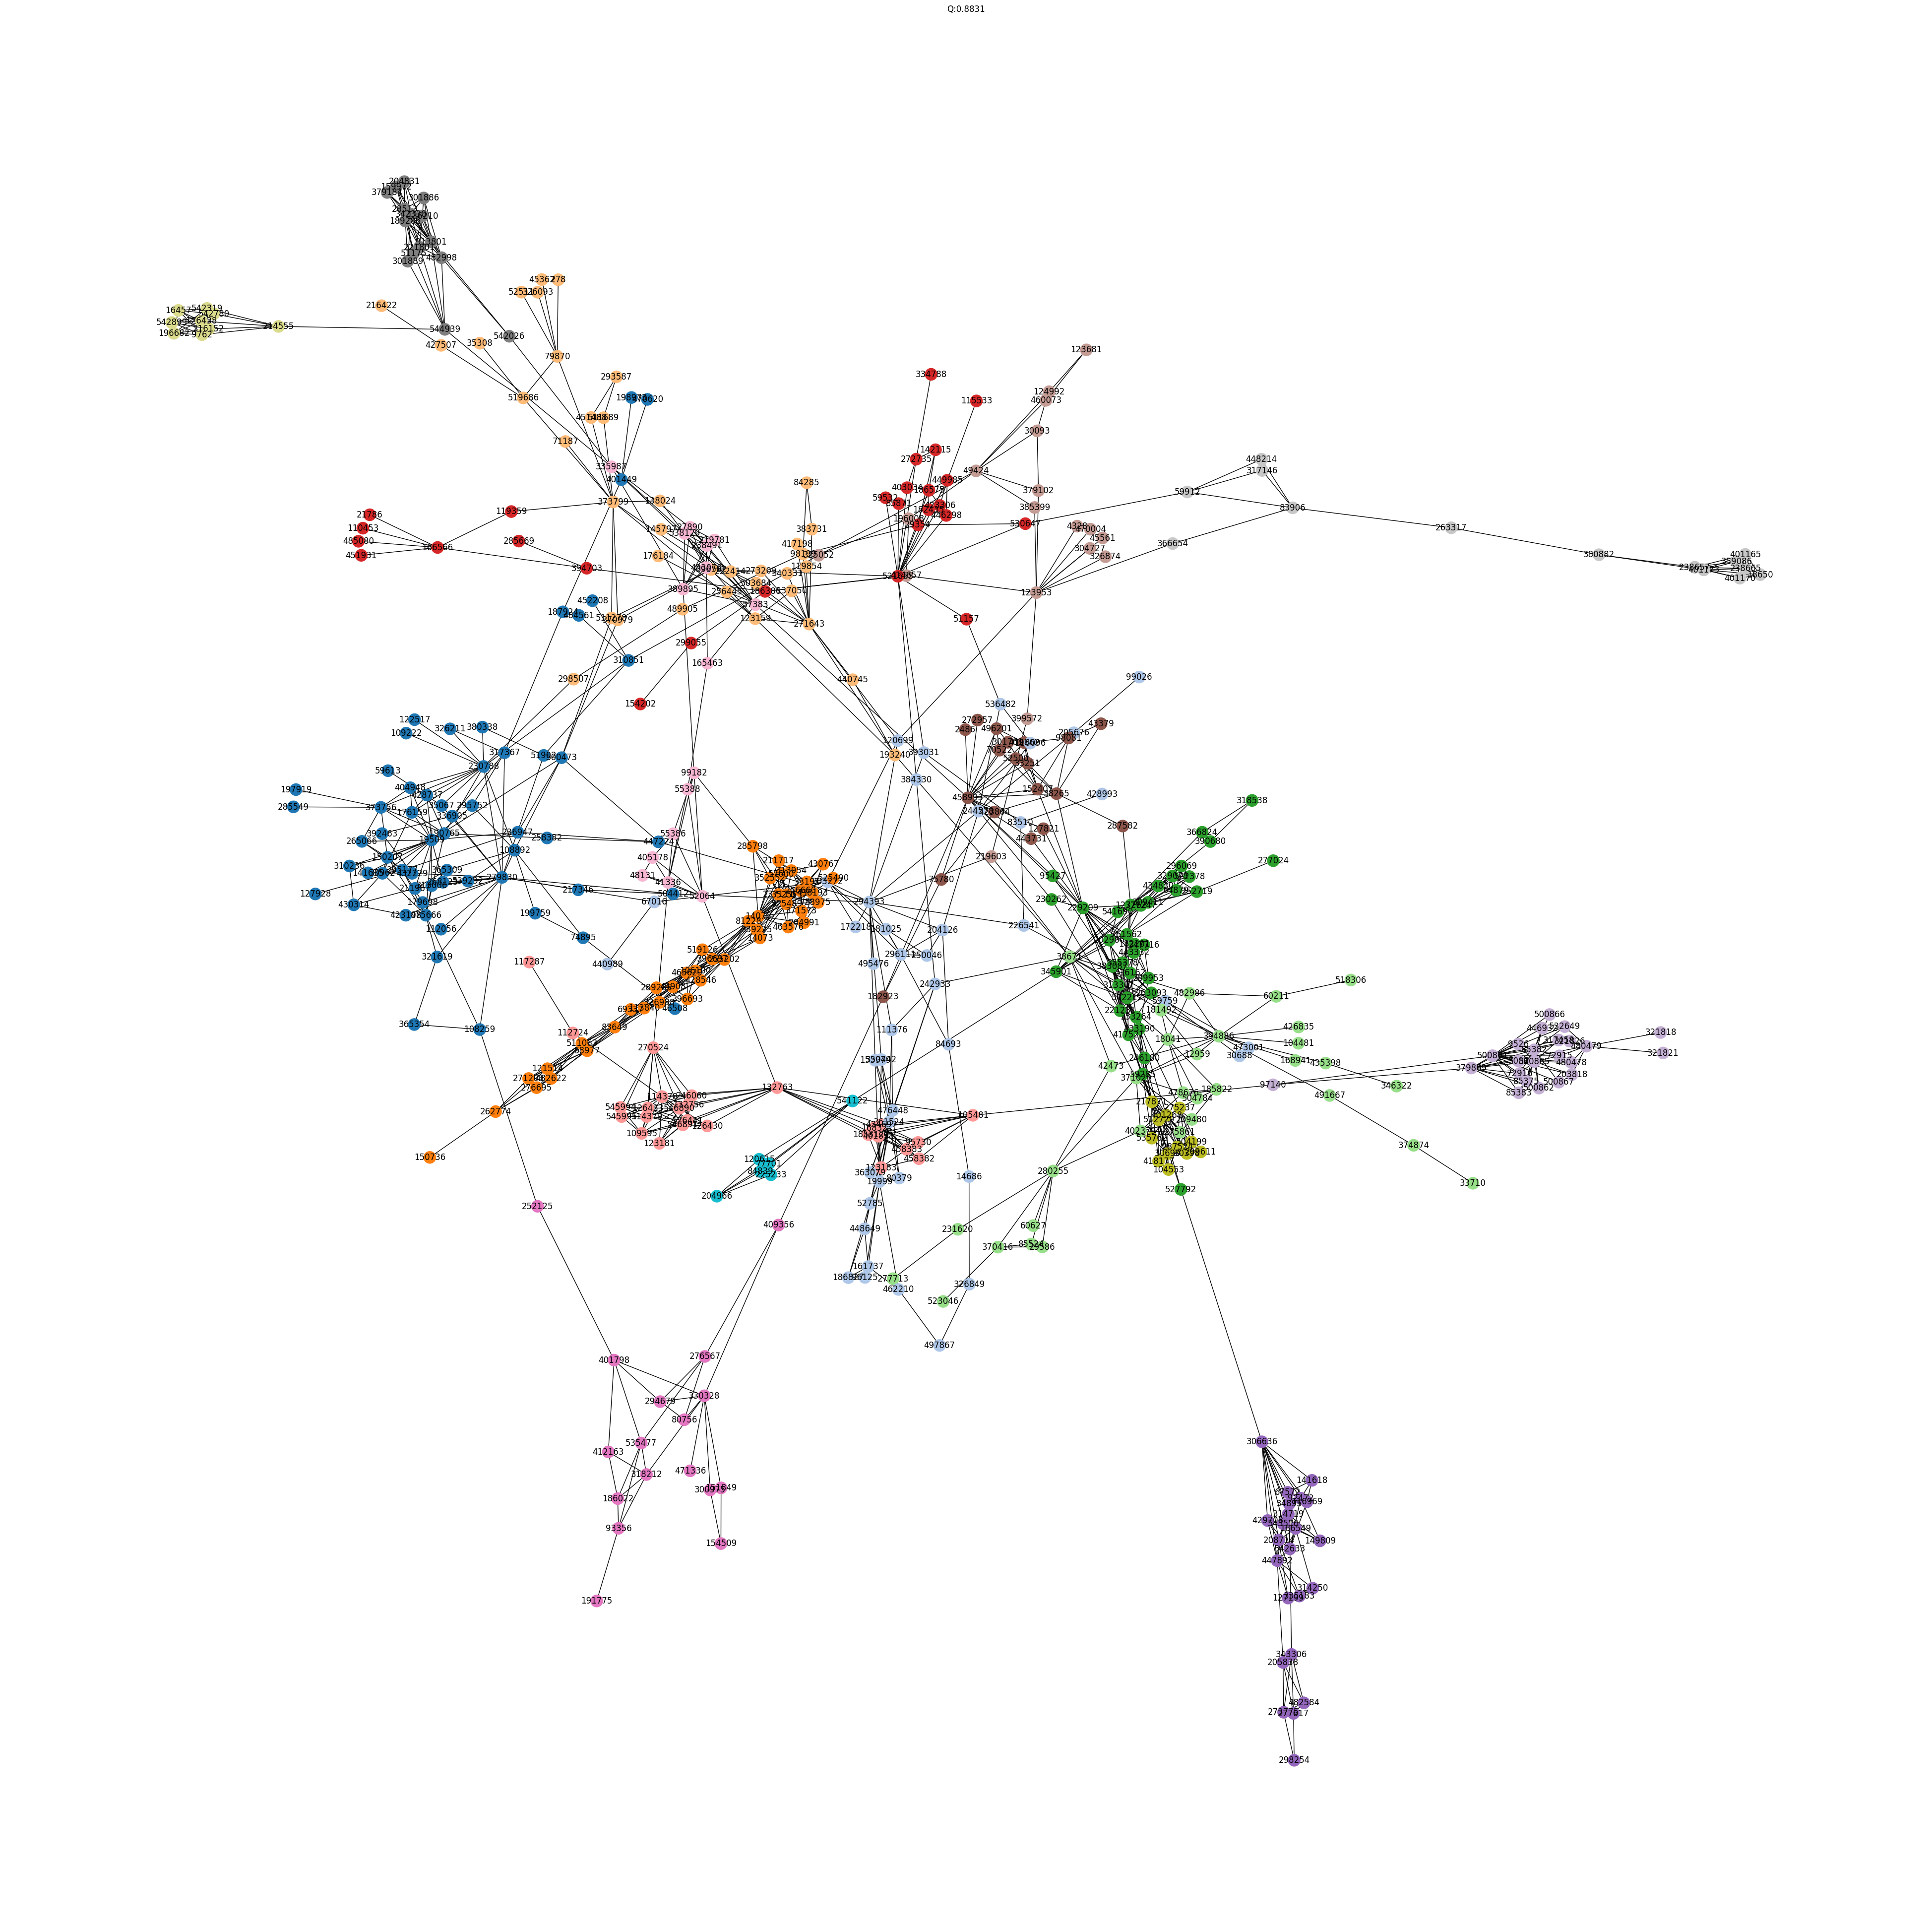

In [24]:
plot_graph(coms)

# Ejercicio B – Algoritmo Evolutivo multiobjetivo

Ya no consiste en usar Leiden sino en optimizar medidas del paper (“Comparison and selection of objective functions in multiobjective community detection”) con una función multiobjetivo.

In [17]:
"""import networkx as nx

def create_initial_population_from_file(num_partitions):
    graph = nx.read_graphml(ROUTE_EJ_A)

    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return graph, population

"""
num_partitions = 5  # Número de particiones

graph, initial_population = create_initial_population_from_file(num_partitions)
print("Initial Population:", initial_population)"""

import random
import networkx as nx
import copy
import statistics

def create_initial_population(graph, num_partitions):
    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return population

def calculate_modularity(graph, partition):
    return nx.algorithms.community.modularity(graph, [set(partition) for partition in partition])

def select(population, fitness_function):
    tournament = random.choices(population, k=2)
    tournament_fitness = [fitness_function(individual) for individual in tournament]
    return tournament[tournament_fitness.index(max(tournament_fitness))]

def crossover(parent1, parent2):
    child = copy.deepcopy(parent1)
    for node in parent2:
        if node not in child:
            child.append(node)
    return child

def mutate(partition, mutation_rate):
    if random.random() < mutation_rate:
        node1, node2 = random.sample(partition, 2)
        partition[partition.index(node1)], partition[partition.index(node2)] = node2, node1
    return partition


def evolve(
    graph, num_partitions, mutation_rate, num_generations, trace_frequency=10
):
    population = create_initial_population(graph, num_partitions)

    ##############################
    # OJO: FITNESS AQUÍ A CHOLÓN #
    ##############################
    fitness_function = lambda partition: calculate_modularity(graph, partition)

    for gen in range(num_generations):
        new_population = []

        while len(new_population) < len(population):
            parent1 = select(population, fitness_function)
            parent2 = select(population, fitness_function)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        if trace_frequency > 0 and gen % trace_frequency == 0:
            best_fitness = max([fitness_function(individual) for individual in population])
            print(f"Generation {gen}: Best Fitness = {best_fitness}")

    best_partition = max(population, key=fitness_function)
    return best_partition, fitness_function(best_partition)"""

SyntaxError: ignored

In [ ]:
# Uso:
best_partition, best_fitness = evolve(amazon_graph, num_partitions=7, mutation_rate=0.1, num_generations=100)
print(f"Best Partition: {best_partition}")
print(f"Best Fitness: {best_fitness}")



"""
    ERROR CAUSADO POR LOS GENES (conjetura blitty) PORQUE SON DE TAMAÑO DINÁMICO
"""

# [SUCIO] Cosas que hemos usado antes

In [ ]:
"""# from pyvis.network import Network

colormap = plt.cm.tab20

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colors = [str_color(*colormap(v)) for v in values]
    return colors

def draw_communities(coms, ax=None):
    colors = assign_colors([coms[n] for n in amazon_graph.nodes()])
    nx.draw(amazon_graph, with_labels=True, ax=ax, node_color=colors)
    ax.set_title(f"Q:{nx.community.modularity(amazon_graph, to_communities_list(coms)):.4f}")

def to_communities_list(coms):
    c_pos = {v:i for i,v in enumerate(set(coms.values()))}

    num_c = len(c_pos)
    com_list = [[] for _ in range(num_c)]

    for k,v in coms.items():
        com_list[c_pos[v]].append(k)

    return com_list

def to_communities_dict(coms):
    inv_map = {}
    for k, v in coms.items():
        inv_map[v] = inv_map.get(v, []) + [k]

    return inv_map


_,ax = plt.subplots(1,figsize=(80,80))
leiden_coms = leiden(amazon_graph).to_node_community_map()
print(leiden_coms)

coms = {k:v[0] for k,v in leiden(amazon_graph).to_node_community_map().items()}
draw_communities(coms,ax)
"""